In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
data_train  = pd.read_csv('data/q1/train.csv')
data_test = pd.read_csv('data/q1/test.csv')
data_validation = pd.read_csv('data/q1/validation.csv')

In [2]:
data_train  = pd.read_csv('data/q1/train.csv')
data_test = pd.read_csv('data/q1/test.csv')
data_validation = pd.read_csv('data/q1/validation.csv')

In [3]:
data_train.dtypes

Unnamed        int64
team          object
opp           object
host          object
year           int64
month         object
toss           int64
day_match      int64
bat_first      int64
format         int64
fow            int64
score          int64
rpo          float64
result         int64
dtype: object

In [4]:

data_train.columns

Index(['Unnamed', 'team', 'opp', 'host', 'year', 'month', 'toss', 'day_match',
       'bat_first', 'format', 'fow', 'score', 'rpo', 'result'],
      dtype='object')

Categorical columns are -> team , opp , host , month 

Question 1

In [3]:
class Node :
    
    def __init__(self,data,feature = None,is_leaf = False, is_categorical = False,target = None):
        self.data = data 
        self.childs = {}
        self.feature = feature
        self.is_leaf = is_leaf
        self.is_categorical = is_categorical
        self.target = target
        self.threshold = None
        self.left = None
        self.right = None


    def add_child(self,child_node,category = None):
        self.childs[category] = child_node
        

class DecisionTree : 
    def __init__(self, max_depth = 5, data = None):
        self.max_depth = max_depth 
        self.data = data 
        self.root = None
        self.categorical_cols = data_train.select_dtypes(include='object').columns.tolist()

    def calculate_entropy(self,data):
        if len(data) == 0:
            return 0
        p = len(data[data['result'] == 1]) / len(data)
        return - (p * math.log2(p) + (1 - p) * math.log2(1 - p)) if p not in [0,1] else 0
    
    def calculate_information_gain(self,data,feature,is_categorical):
        if is_categorical:
            H = 0
            for category in data[feature].unique():
                subset = data[data[feature] == category]
                H += len(subset)/len(data) * self.calculate_entropy(subset)
        else:
            threshold = data[feature].median()
            sub_left =   data[data[feature] <= threshold]
            sub_right = data[data[feature] > threshold]
            H = (len(sub_left)/len(data)) * self.calculate_entropy(sub_left) + (len(sub_right)/len(data)) * self.calculate_entropy(sub_right)  
        return self.calculate_entropy(data) - H        


    def get_best_split(self,data):
        best_gain = 0
        best_feature = None
        for feature in data.columns:
            if feature == 'result':
                continue
            if feature in self.categorical_cols:is_categorical = True
            else:is_categorical = False
            gain = self.calculate_information_gain(data,feature,is_categorical)
            if gain >= best_gain :
                best_gain = gain
                best_feature = feature
        return best_feature


    def build_tree(self,data,depth):
        
        if depth == self.max_depth or self.calculate_entropy(data) == 0:
            target = 1 if len(data[data['result'] == 1]) >= len(data[data['result'] == 0]) else 0
            return Node(data,is_leaf = True,target = target)

        best_feature = self.get_best_split(data)
        root  = Node(data,feature = best_feature)
        root.target = 1 if len(data[data['result'] == 1]) >= len(data[data['result'] == 0]) else 0

        if best_feature in self.categorical_cols:
            root.is_categorical = True
            for category in data[best_feature].unique():
                subset = data[data[best_feature] == category]
                if len(subset) == 0:
                    target = 1 if len(data[data['result'] == 1]) >= len(data[data['result'] == 0]) else 0
                    child_node = Node(data,is_leaf = True,target = target)
                else:
                    child_node = self.build_tree(subset,depth + 1)
                root.add_child(child_node=child_node, category = category)
        else:
            threshold = data[best_feature].median()
            subset_left = data[data[best_feature] <= threshold]
            subset_right = data[data[best_feature] > threshold]
            if len(subset_left) == 0:
                target = 1 if len(data[data['result'] == 1]) >= len(data[data['result'] == 0]) else 0
                child_left = Node(data,is_leaf = True,target = target)
            else:    
                child_left = self.build_tree(subset_left, depth + 1)
            if len(subset_right) == 0:
                target = 1 if len(data[data['result'] == 1]) >= len(data[data['result'] == 0]) else 0
                child_right = Node(data,is_leaf = True,target = target)
            else:
                child_right = self.build_tree(subset_right, depth + 1)
                
            root.left = child_left
            root.right = child_right 
            root.threshold = threshold
        return root     
 
    
    def fit(self):
        self.root = self.build_tree(self.data, 0)


    def predict(self, data):
        y_predictions = []
        for _,row in data.iterrows():
            
            current_node = self.root
            while not current_node.is_leaf : 
                feature = current_node.feature
                if feature in self.categorical_cols:
                    category = row[feature]
                    if category  in current_node.childs:
                        current_node = current_node.childs[category]
                    else:
                        break    
                else:
                    threshold = current_node.threshold
                    if row[feature] <= threshold:
                        current_node = current_node.left
                    else:
                        current_node = current_node.right
            y_predictions.append(current_node.target)

      
        
        return y_predictions
                            



Train -accuracy for depth 5 :  88.34802606362591 %
Validation-accuracy for depth 5 :  56.896551724137936 %
Test-accuracy for depth 5 :  58.94519131334023 %
-----------------------------------
Train -accuracy for depth 10 :  99.97444742557813 %
Validation-accuracy for depth 10 :  56.43678160919541 %
Test-accuracy for depth 10 :  58.42812823164426 %
-----------------------------------
Train -accuracy for depth 15 :  100.0 %
Validation-accuracy for depth 15 :  56.32183908045977 %
Test-accuracy for depth 15 :  58.42812823164426 %
-----------------------------------
Train -accuracy for depth 20 :  100.0 %
Validation-accuracy for depth 20 :  56.32183908045977 %
Test-accuracy for depth 20 :  58.42812823164426 %
-----------------------------------


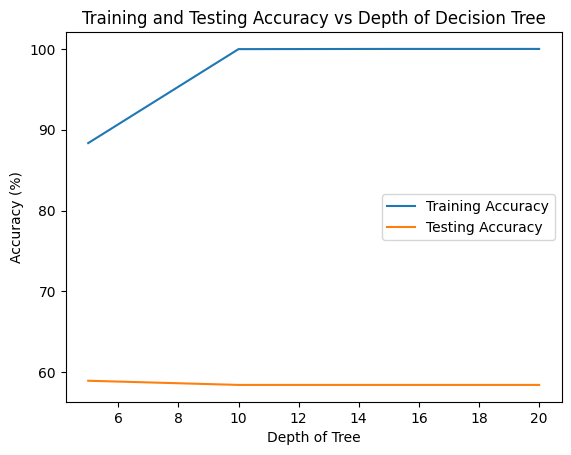

In [6]:
depth = [5,10,15,20]
train_acc = []
test_acc = []
for dpt in depth:
    Dtree = DecisionTree(max_depth = dpt , data=data_train)
    Dtree.fit()
    validation_result = Dtree.predict(data_validation)
    test_result = Dtree.predict(data_test)
    train_result = Dtree.predict(data_train)
    correct_predictions_validation = sum(validation_result == data_validation['result'])
    correct_predictions_test = sum(test_result == data_test['result'])
    correct_predictions_train = sum(train_result == data_train['result'])
    train_acc.append(correct_predictions_train / len(data_train) * 100)
    test_acc.append(correct_predictions_test / len(data_test) * 100)
    print(f"Train -accuracy for depth {dpt} : ", correct_predictions_train / len(data_train) * 100 , '%')
    print(f"Validation-accuracy for depth {dpt} : ", correct_predictions_validation / len(data_validation) * 100 , '%')
    print(f"Test-accuracy for depth {dpt} : ", correct_predictions_test / len(data_test) * 100 , '%')

    print('-----------------------------------')


plt.plot(depth, train_acc, label='Training Accuracy')
plt.plot(depth, test_acc, label='Testing Accuracy')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy vs Depth of Decision Tree')
plt.legend()
plt.show()
